In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
df=pd.read_csv('globalterrorismdb_0718dist.csv')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df = df[['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
    'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt',
    'nkill', 'nwound', 'gname']]
df.head(20)

,eventid,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,nkill,nwound,gname
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,1.0,0.0,MANO-D
1,197000000002,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,23rd of September Communist League
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,1.0,0.0,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),NaN,NaN,Unknown
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,Unknown
5,197001010002,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,Police,0.0,0.0,Black Nationalists
6,197001020001,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,Police,0.0,0.0,Tupamaros (Uruguay)
7,197001020002,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,Utilities,0.0,0.0,Unknown
8,197001020003,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,Military,0.0,0.0,New Year's Gang
9,197001030001,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,Government (General),0.0,0.0,New Year's Gang


In [21]:
df.shape

(181691, 15)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   imonth           181691 non-null  int64  
 3   iday             181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   attacktype1_txt  181691 non-null  object 
 10  targtype1_txt    181691 non-null  object 
 11  nkill            171378 non-null  float64
 12  nwound           165380 non-null  float64
 13  gname            181691 non-null  object 
dtypes: float64(4), int64(4), object(6)
memory usage: 19.4+ MB
None


In [7]:
print(df.describe())

            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            latitude     longitude          nkill         nwound  
count  177135.000000  1.771340e+05  171378.000000  165380.000000  
mean       23.498343 -4.586957e+02       2.403272       3.167668  
std        18.569242  2.047790e+05      11.545741      35.949392  
min       -53.154613 -8.618590e+07       0.000000       0.000000  
25%        11.510046  4.545640e+00       0.000000   

In [8]:
df.isnull().sum()

eventid                0
iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
city                 434
latitude            4556
longitude           4557
attacktype1_txt        0
targtype1_txt          0
nkill              10313
nwound             16311
gname                  0
dtype: int64

In [9]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [10]:
df.isnull().sum()

eventid           0
Year              0
Month             0
day               0
Country           0
Region            0
City            434
latitude       4556
longitude      4557
Attacktype        0
Targettype        0
kill          10313
Wound         16311
Group             0
dtype: int64

In [24]:
df = df.dropna(subset=['City', 'latitude', 'longitude', 'kill', 'Wound'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176708 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      176708 non-null  int64  
 1   Year         176708 non-null  int64  
 2   Month        176708 non-null  int64  
 3   day          176708 non-null  int64  
 4   Country      176708 non-null  object 
 5   Region       176708 non-null  object 
 6   City         176708 non-null  object 
 7   latitude     176708 non-null  float64
 8   longitude    176708 non-null  float64
 9   Attacktype   176708 non-null  object 
 10  Targettype   176708 non-null  object 
 11  kill         176708 non-null  float64
 12  Wound        176708 non-null  float64
 13  Group        176708 non-null  object 
 14  Casualities  176708 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 21.6+ MB


In [25]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

              eventid      Year     Month       day  latitude  longitude  \
eventid      1.000000  0.999996  0.001335  0.017191  0.167279   0.003905   
Year         0.999996  1.000000 -0.001240  0.017112  0.167326   0.003915   
Month        0.001335 -0.001240  1.000000  0.004066 -0.015795  -0.003885   
day          0.017191  0.017112  0.004066  1.000000  0.003562  -0.002287   
latitude     0.167279  0.167326 -0.015795  0.003562  1.000000   0.001466   
longitude    0.003905  0.003915 -0.003885 -0.002287  0.001466   1.000000   
kill         0.025455  0.025446  0.003450 -0.003203 -0.013281  -0.000586   
Wound        0.017103  0.017095  0.003120 -0.001169  0.015890   0.000205   
Casualities  0.021429  0.021420  0.003584 -0.001863  0.009842   0.000014   

                 kill     Wound  Casualities  
eventid      0.025455  0.017103     0.021429  
Year         0.025446  0.017095     0.021420  
Month        0.003450  0.003120     0.003584  
day         -0.003203 -0.001169    -0.001863  
lati

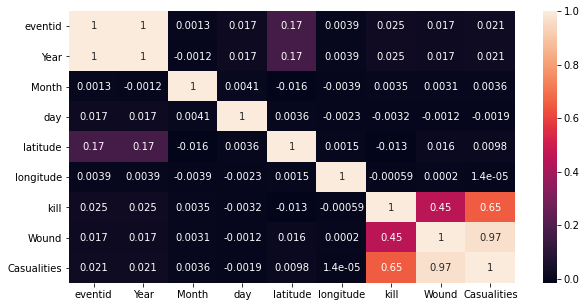

In [26]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10,5))
# Use the numeric DataFrame for the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

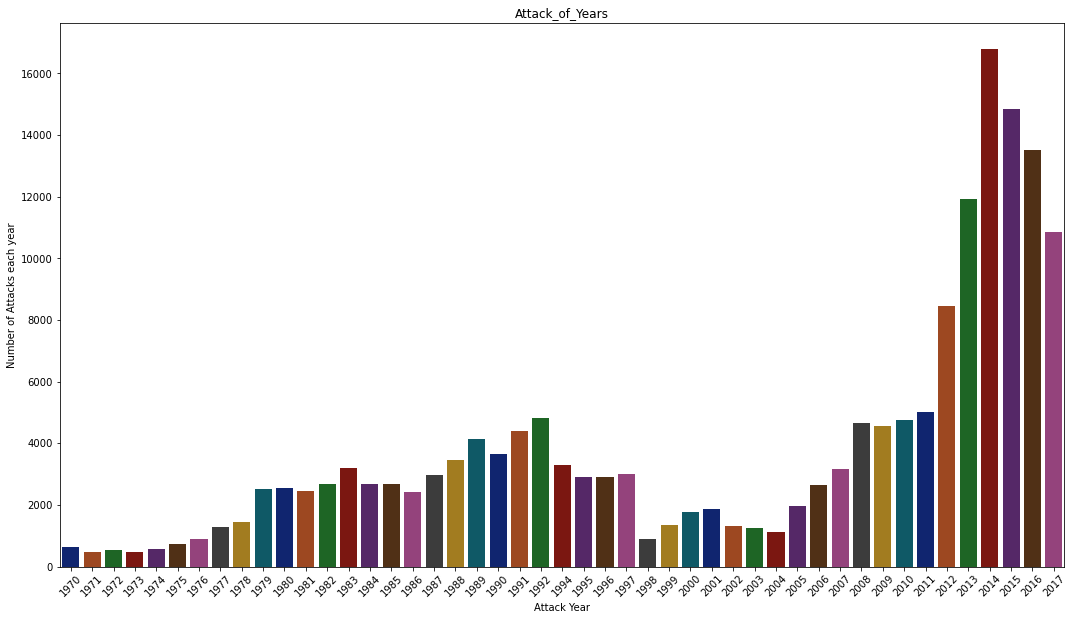

In [27]:
df['Year'].value_counts(dropna = False).sort_index()
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'dark')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

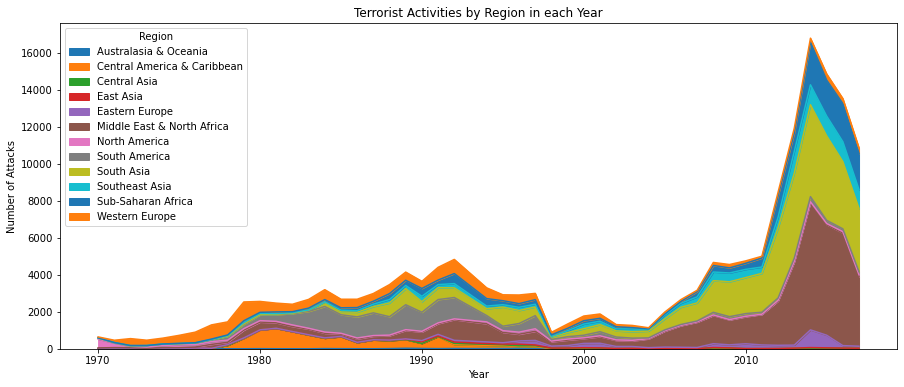

In [28]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

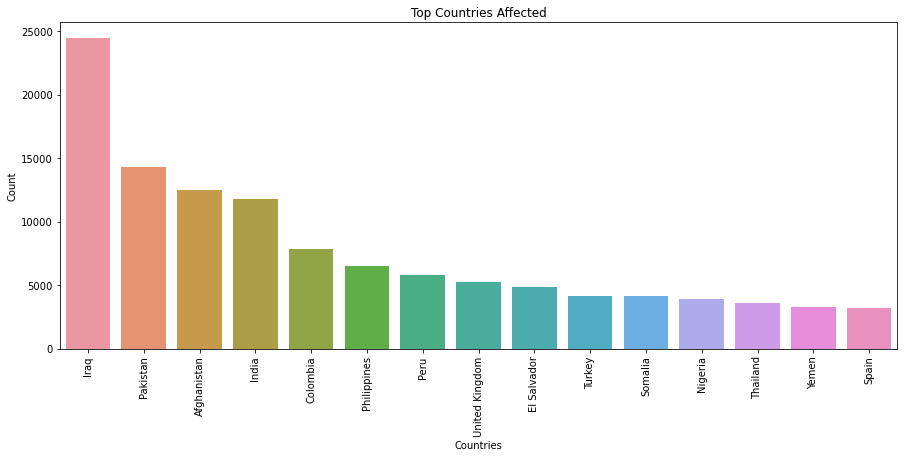

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Country'].value_counts()[:15].index, y=df['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Casualities')

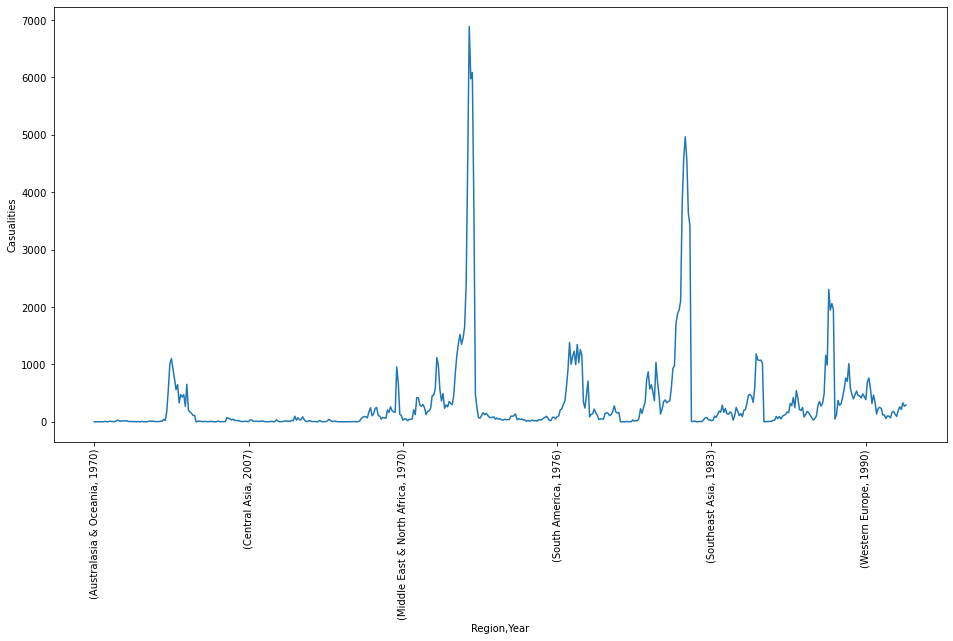

In [30]:
plt.subplots(figsize=(16,8))
df.groupby(['Region', 'Year']).count()['Casualities'].plot()
plt.xticks(rotation=90)
plt.ylabel("Casualities")

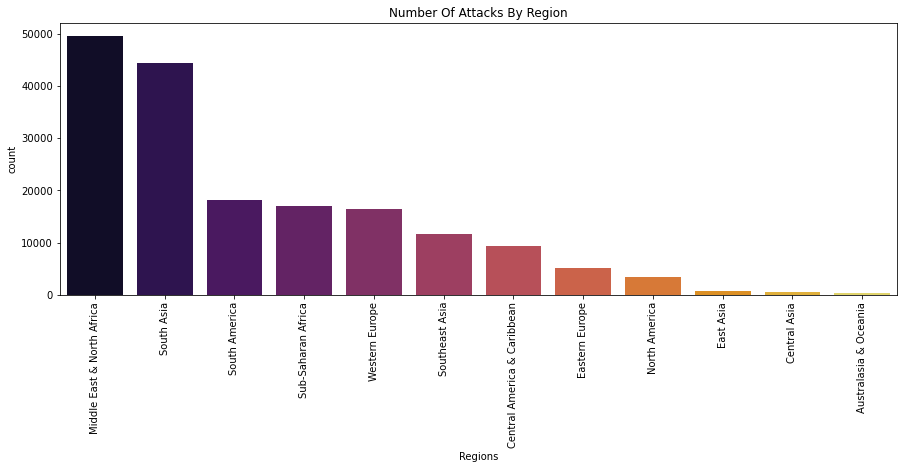

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='Region', data=df, palette='inferno', order=df['Region'].value_counts().index, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Regions')
ax.set_title('Number Of Attacks By Region')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176708 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      176708 non-null  int64  
 1   Year         176708 non-null  int64  
 2   Month        176708 non-null  int64  
 3   day          176708 non-null  int64  
 4   Country      176708 non-null  object 
 5   Region       176708 non-null  object 
 6   City         176708 non-null  object 
 7   latitude     176708 non-null  float64
 8   longitude    176708 non-null  float64
 9   Attacktype   176708 non-null  object 
 10  Targettype   176708 non-null  object 
 11  kill         176708 non-null  float64
 12  Wound        176708 non-null  float64
 13  Group        176708 non-null  object 
 14  Casualities  176708 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 25.6+ MB


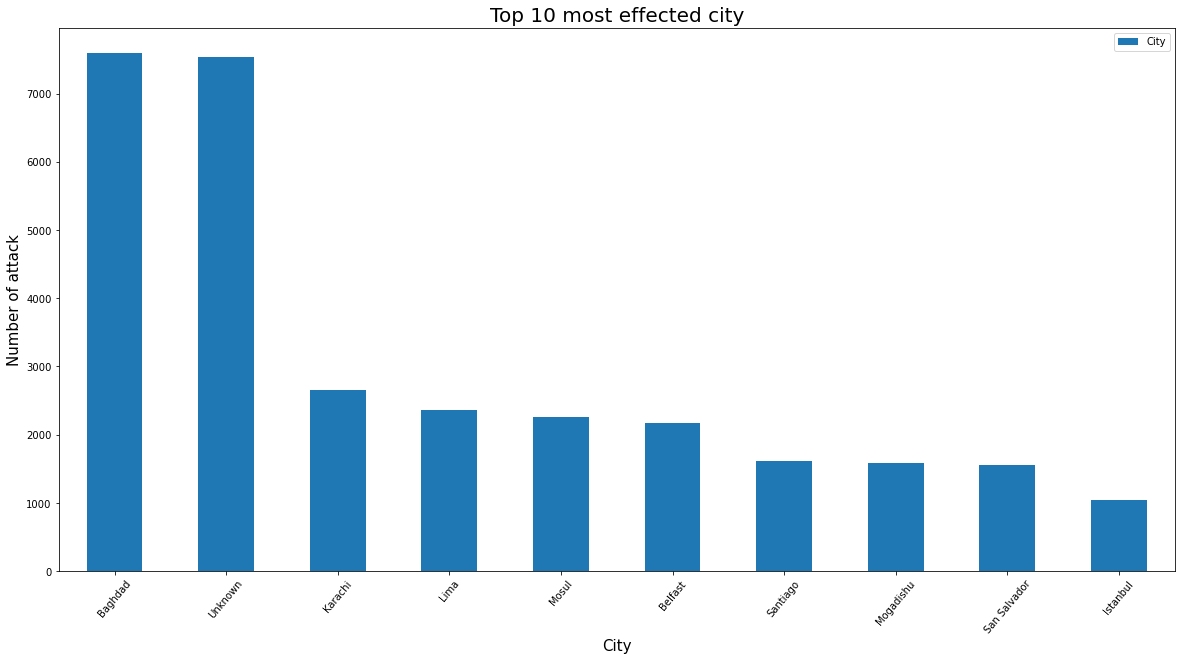

In [37]:
df['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10))
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

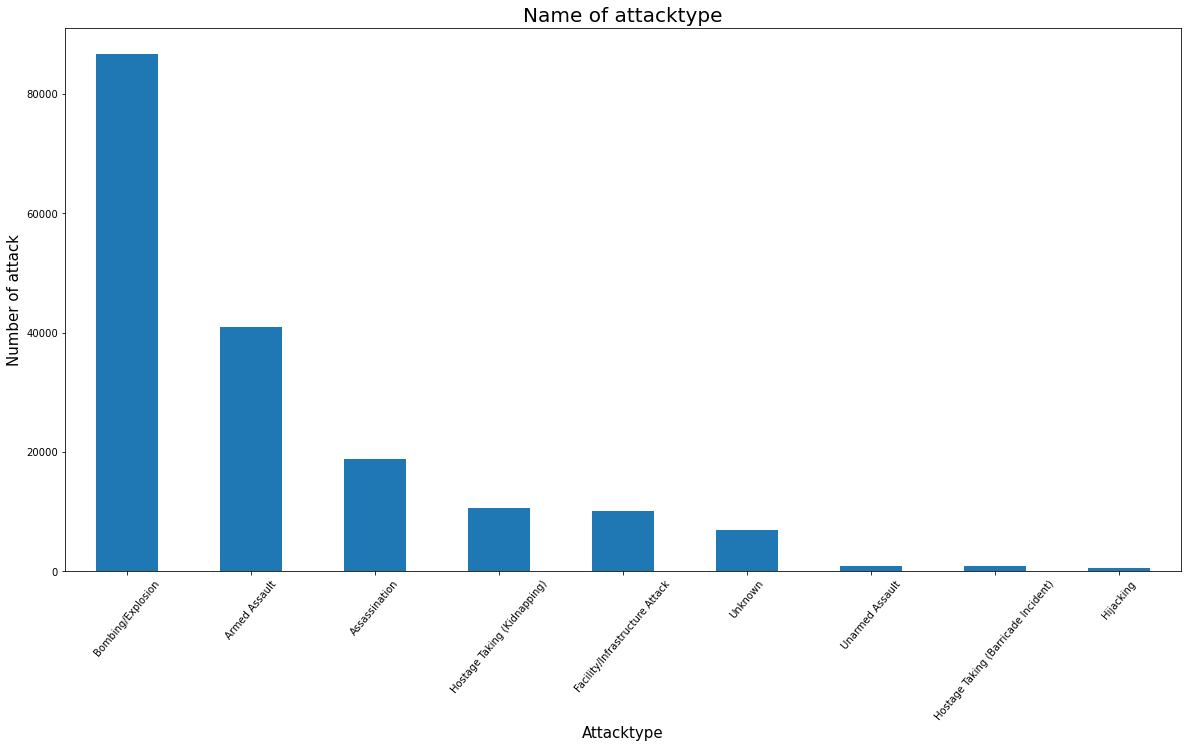

In [38]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10))
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

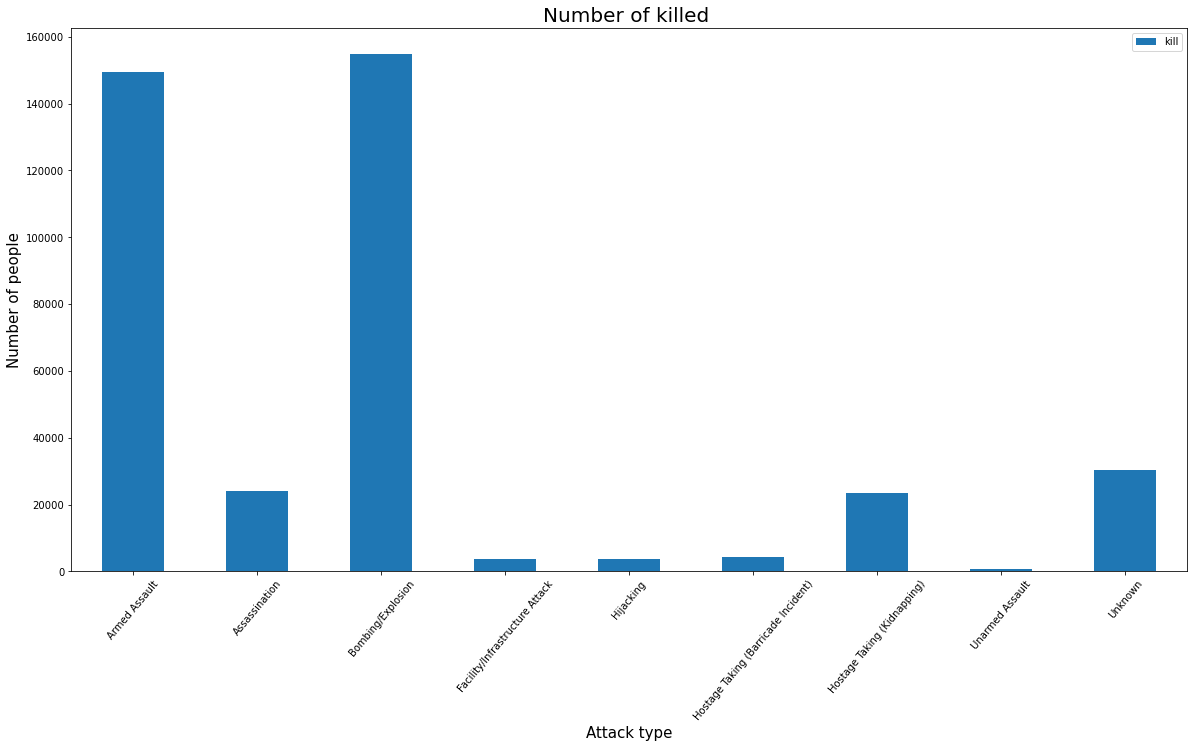

In [39]:
df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10))
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

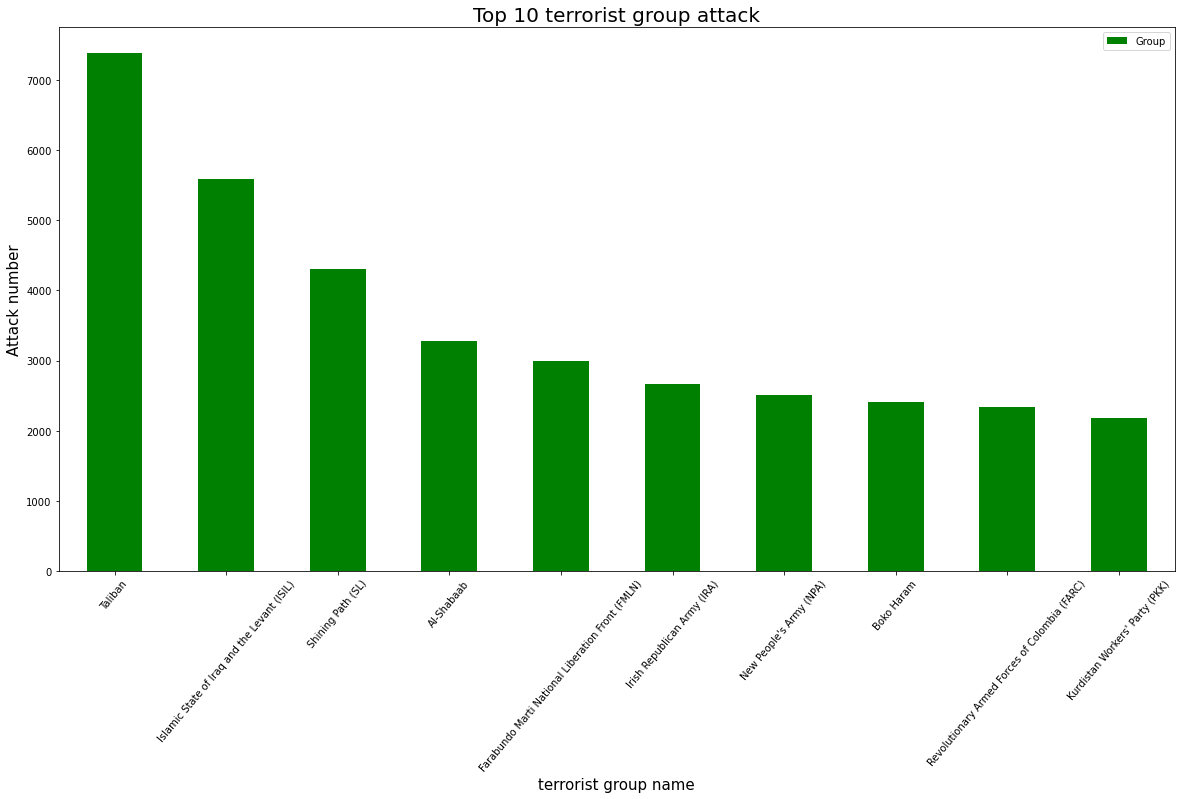

In [40]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.xticks(rotation=50)
plt.ylabel("Attack number",fontsize=15)
plt.show()

In [41]:
Target_data = df['Targettype'].value_counts().nlargest(n=15)
Target_data

Private Citizens & Property       42373
Military                          26879
Police                            24105
Government (General)              20739
Business                          20230
Transportation                     6539
Unknown                            5828
Utilities                          5544
Religious Figures/Institutions     4373
Educational Institution            4248
Government (Diplomatic)            3511
Terrorists/Non-State Militia       2971
Journalists & Media                2854
Violent Political Party            1839
Airports & Aircraft                1309
Name: Targettype, dtype: int64

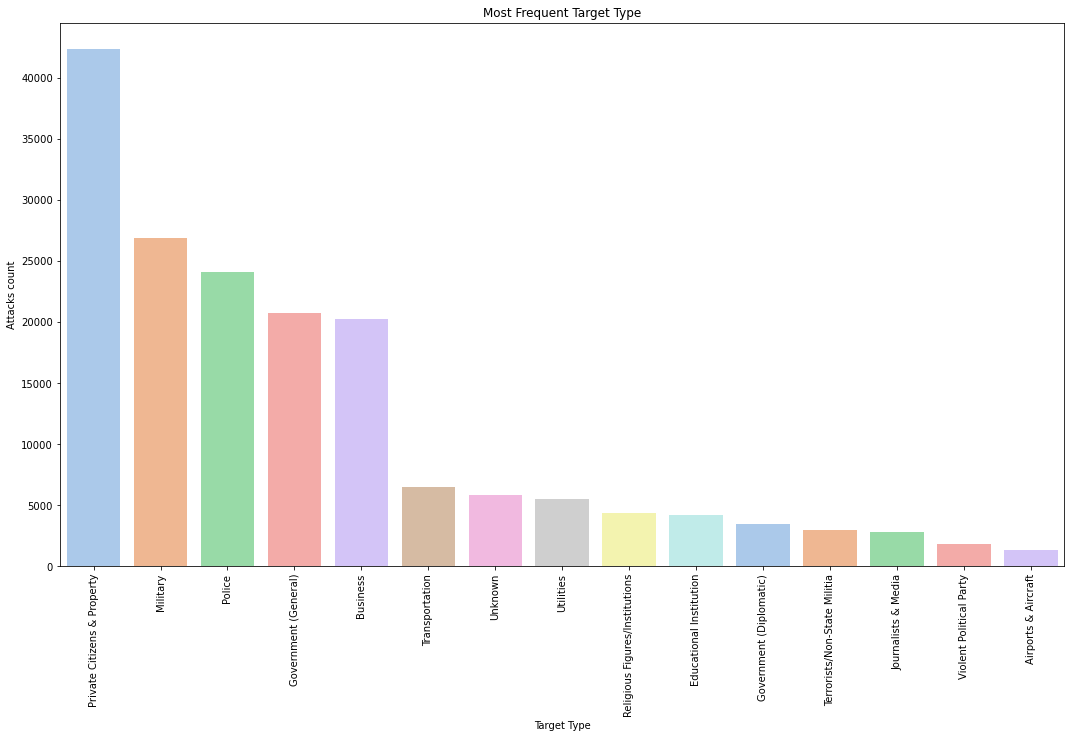

In [42]:
plt.figure(figsize= (18,10))
sns.barplot(x = Target_data.index , y = Target_data.values,palette='pastel')
plt.title('Most Frequent Target Type')
plt.xlabel('Target Type')
plt.xticks(rotation=50)
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

In [43]:
df=df[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,30998.0
1,Taliban,Afghanistan,29117.0
2,Boko Haram,Nigeria,16912.0
3,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10672.0
4,Shining Path (SL),Peru,10168.0
5,Al-Shabaab,Somalia,8174.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,7538.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6798.0
8,Tehrik-i-Taliban Pakistan (TTP),Pakistan,5986.0
9,Revolutionary Armed Forces of Colombia (FARC),Colombia,5019.0


In [45]:
kill = df.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 131382


In [46]:
CountryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
CountryKill

Country,Afghanistan,Colombia,El Salvador,Iraq,Nigeria,Pakistan,Peru,Somalia,Sri Lanka,Syria
kill,29117.0,5019.0,7538.0,30998.0,16912.0,5986.0,10168.0,8174.0,10672.0,6798.0
